# visualization with python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = r'0116 시각화/diamonds.csv'
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [2]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

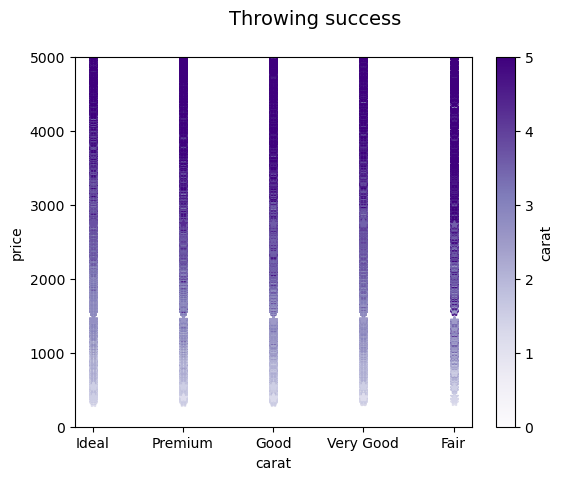

In [3]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(cut,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("carat")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [4]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

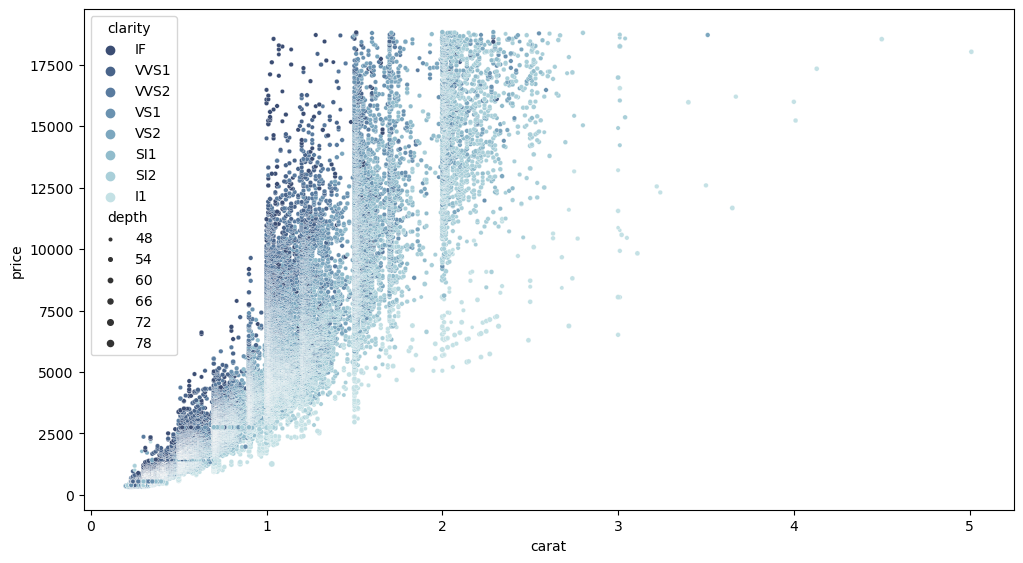

In [5]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


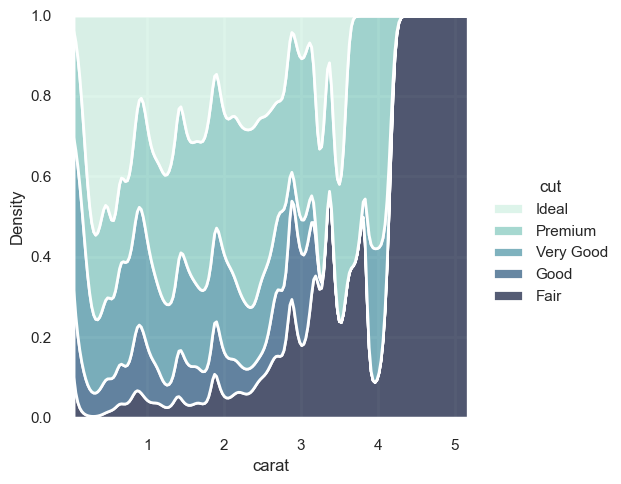

In [6]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

* 1번
    * 목적과 효과: 'carat' 특성에 따른 'cut'과 'price'의 관계를 시각화하고자 하는 목적입니다. 'carat' 값이 커질수록 진한 보라색으로 나타나게 하여 'carat' 값에 따른 'cut'과 'price'의 관계를 보여주는 효과가 있습니다.
    * 개선점: 'color'와 'clarity' 특성도 시각화에 포함한다면 그 영향을 확인해볼 수 있을 것입니다. x축은 'cut' 분류인데 label이 'carat'으로 되어 있으므로 수정할 필요가 있습니다. 또한 제목이 'Throwing success'로 되어있는데 그 의미가 무엇인지 시각화에서 확인할 수 없습니다. 데이터 양이 많아서, 'carat'의 분포가 한 눈에 잘 보이지 않습니다.
* 2번
    * 목적과 효과: 'carat'과 'price'의 관계를 시각화하고자 하는 목적이며, 'clarity'와 'depth'특성에 따른 차이도 보여주고자 합니다. 'clarity'와 'depth'에 따라 각각 점의 색상과 크기를 다르게 하여 그 영향을 보여줍니다.
    * 개선점: 제목이 없으므로 적당한 제목을 붙여줄 필요가 있습니다. 데이터가 모여있는 부분에서는 점 크기의 차이가 잘 보이지 않으므로 'depth'를 다른 방식으로 시각화하여 더 잘 보이도록 바꾸어주면 좋겠습니다.
* 3번
    * 목적과 효과: 'cut'에 따라 'carat'의 분포를 시각화하여 보이고자 하는 목적입니다. 'cut' 종류에 따라 다른 색상으로 시각화하여, 분포의 차이를 쉽게 비교할 수 있습니다.
    * 개선점: 제목이 없으므로 적당한 제목을 붙여줄 필요가 있습니다.


2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

* 'cut', 'color', 'clarity' 각각에 대해 'carat'과 'price'의 관계를 보여주는 그래프를 그렸습니다. 또한 'carat'의 분포를 boxplot을 이용하여 파악할 수 있도록 하였습니다. 각각의 그래프에 적당한 제목을 붙여주었으며 축의 label도 그래프에 맞게 붙여주었습니다.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

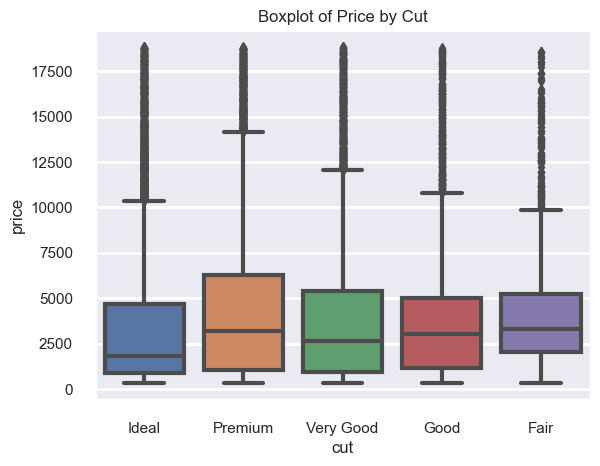

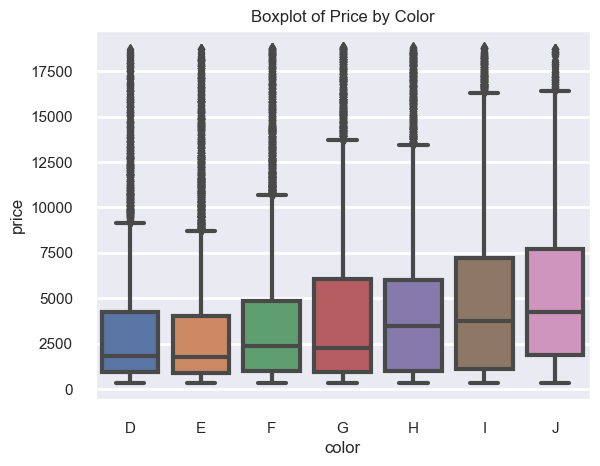

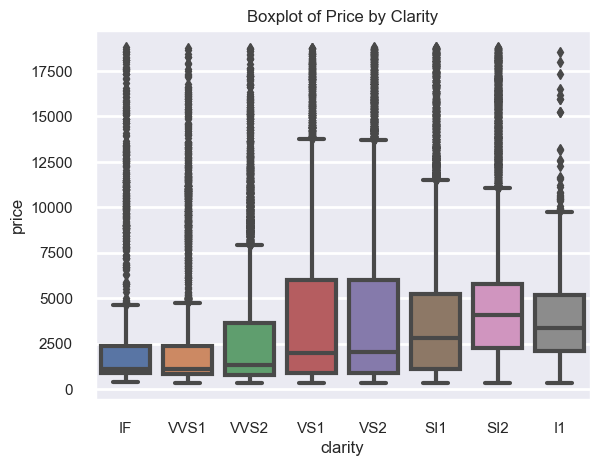

In [11]:
# 여기에 공통과제 2번 코드를 작성해주세요. 주석을 꼼꼼하게 작성하여 왜 이렇게 시각화를 했는지 설명해주시면 더 좋습니다!

# Plot 1: x-axis = cut
fig, ax = plt.subplots()
sns.boxplot(x='cut', y='price', data=df, ax=ax)
ax.set_xlabel('cut')
ax.set_ylabel('price')
ax.set_title('Boxplot of Price by Cut')

# Plot 2: x-axis = color|
fig, ax = plt.subplots()
sns.boxplot(x='color', y='price', data=df, ax=ax)
ax.set_xlabel('color')
ax.set_ylabel('price')
ax.set_title('Boxplot of Price by Color')

# Plot 3: x-axis = clarity
fig, ax = plt.subplots()
sns.boxplot(x='clarity', y='price', data=df, ax=ax)
ax.set_xlabel('clarity')
ax.set_ylabel('price')
ax.set_title('Boxplot of Price by Clarity')

plt.show()

# 시각화 과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


* 여기에 답을 작성해주세요.
    * 과제 3-1
    1. 질문: 신발 사이즈와 판매량의 관계가 어떻게 되는가?
    2. 살펴봐야하는 변수 및 특성: Shoe Size
    3. 결론: 9.0~11.0 사이즈가 가장 많이 판매된다.
    4. 인사이트 및 계획: 많이 팔리는 사이즈를 많이 만든다.

    * 과제 3-2
    1. 질문: 판매 가격과 판매량의 관계가 어떻게 되는가? 가격이 쌀수록 판매량이 늘어나는가?
    2. 살펴봐야하는 변수 및 특성: Sale Price, (1) 원본 데이터의 문법으로 인해 object타입으로 인식되므로 float형으로 바꿔줄 필요가 있다. (2) 1000달러보다 비싼 가격대도 다양하게 존재하지만, 그 수는 1000달로 이하보다 적다. 따라서 그래프 모양을 잘 확인하기 위해서는 데이터를 분리하여 보여줄 필요가 있다.
    3. 결론: 전반적으로 판매 가격이 낮을수록 판매량이 많다. 
    4. 인사이트 및 계획: 판매가격을 낮출 수 있는 경우, 낮춰서 판매한다.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


In [48]:
# 여기에 시각화 코드 혹은 태블로 public 링크를 첨부해주세요.

df = pd.read_csv('StockX-Data-Contest-2019-3.csv')
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


## 과제 3-1

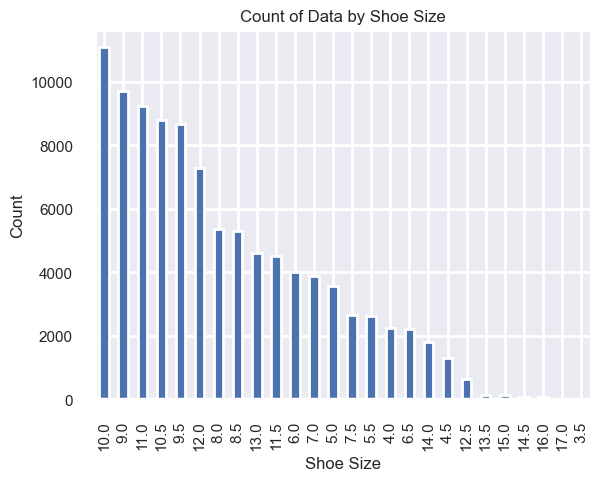

In [82]:
df['Shoe Size'].value_counts().plot(kind='bar')
plt.xlabel('Shoe Size')
plt.ylabel('Count')
plt.title('Count of Data by Shoe Size')
plt.show()

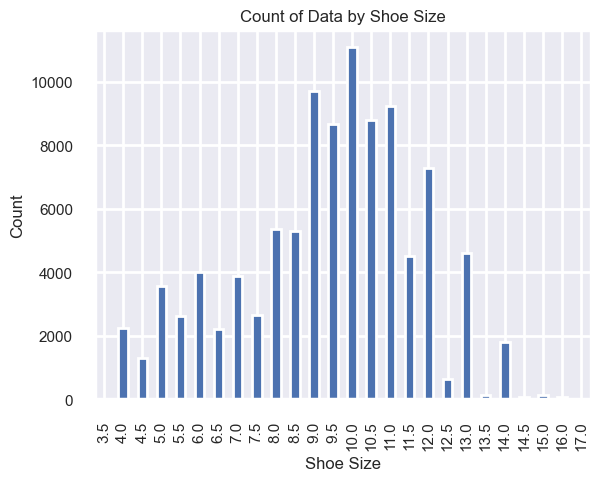

In [38]:
df['Shoe Size'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Shoe Size')
plt.ylabel('Count')
plt.title('Count of Data by Shoe Size')
plt.show()

## 과제 3-2

In [49]:
df['Sale Price'] = df['Sale Price'].str.replace('$', '').str.replace(',', '').astype(float)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


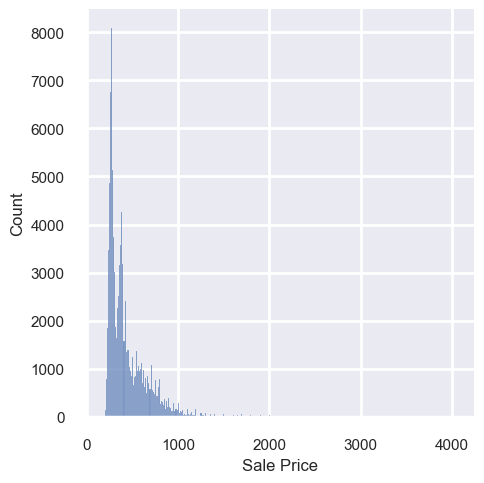

In [78]:
sns.displot(df['Sale Price'])

<Axes: >

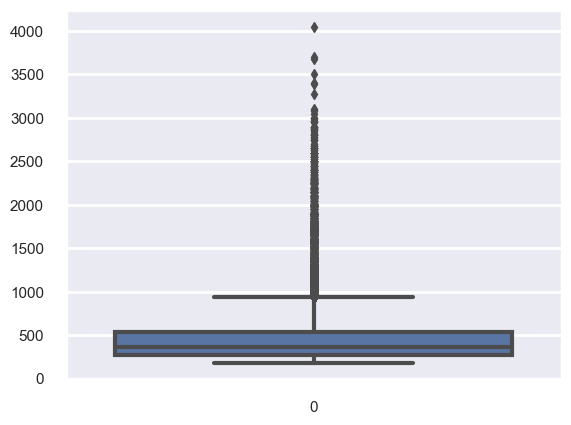

In [77]:
sns.boxplot(data=df['Sale Price'])

In [79]:
expensive_shoes = df[df['Sale Price'] > 1000]
inexpensive_shoes = df[df['Sale Price'] <= 1000]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


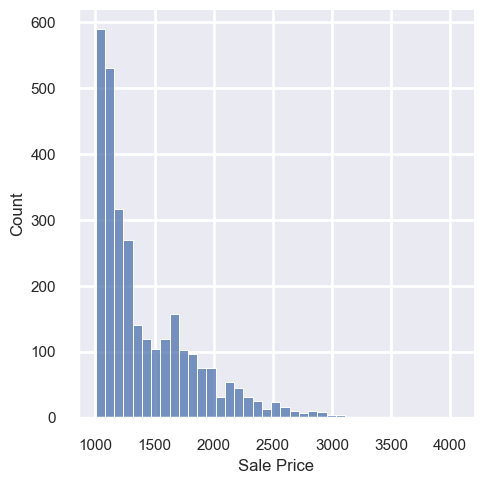

In [80]:
sns.displot(expensive_shoes['Sale Price'])


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


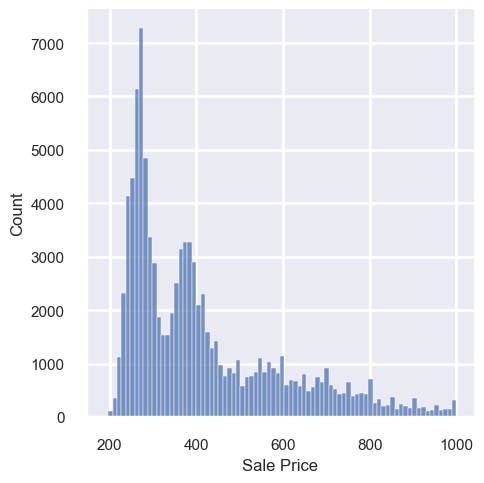

In [81]:
sns.displot(inexpensive_shoes['Sale Price'])